Lets Import all the required libraries

In [2]:
import numpy as np
import torch
import pandas as pd
import matplotlib.pyplot as plt
import cv2

In [3]:
import torchvision as tv
import torch.nn as nn
import torch.functional as F

In [4]:
import os
from zipfile import ZipFile
from PIL import Image

We did not get that proper dataset so we will prepare the dataset using another Neural Network.<br><br>
So lets import the test dataset which will be the train data for the final model.

In [6]:
path = 'E:\\Study material\\Models and Datasets\\SIH\\New folder (5)\\Version 1 - C'
test = []
for img in os.listdir(path):
    image = Image.open(os.path.join(path, img))
    resized_image = image.resize([340,255])
    test.append(resized_image)

As we are training the model using pytorch so it requies the input in form of tensors so convert the images into tensors.

In [7]:
transf_to_tensor = tv.transforms.ToTensor()

In [8]:
test_tensor = []
for img in test:
    test_tensor.append(transf_to_tensor(img))

In [10]:
test_tensor[0]

tensor([[[0.7961, 0.7961, 0.7961,  ..., 0.7529, 0.7569, 0.7569],
         [0.8000, 0.8039, 0.8000,  ..., 0.7647, 0.7608, 0.7608],
         [0.7882, 0.7882, 0.8039,  ..., 0.7647, 0.7608, 0.7569],
         ...,
         [0.7059, 0.7059, 0.7020,  ..., 0.0314, 0.0392, 0.0392],
         [0.7020, 0.6902, 0.7020,  ..., 0.0392, 0.0392, 0.0392],
         [0.7020, 0.7059, 0.7098,  ..., 0.0431, 0.0431, 0.0471]],

        [[0.7922, 0.7961, 0.7922,  ..., 0.7490, 0.7608, 0.7608],
         [0.7961, 0.8000, 0.8000,  ..., 0.7608, 0.7647, 0.7647],
         [0.7843, 0.7843, 0.8000,  ..., 0.7686, 0.7647, 0.7608],
         ...,
         [0.7216, 0.7216, 0.7176,  ..., 0.0627, 0.0706, 0.0667],
         [0.7176, 0.7059, 0.7176,  ..., 0.0627, 0.0706, 0.0706],
         [0.7059, 0.7098, 0.7137,  ..., 0.0588, 0.0667, 0.0588]],

        [[0.8118, 0.8039, 0.8157,  ..., 0.7725, 0.7765, 0.7765],
         [0.8196, 0.8196, 0.8314,  ..., 0.7922, 0.7843, 0.7804],
         [0.8078, 0.8078, 0.8314,  ..., 0.7882, 0.7843, 0.

Lets see how our test data pictures looks like.

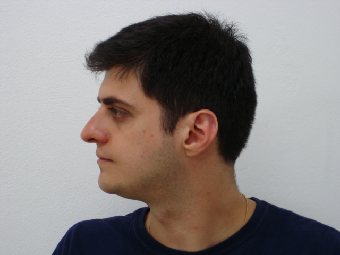

In [128]:
test[0]

Now lets have a look of downsampled tensor image.

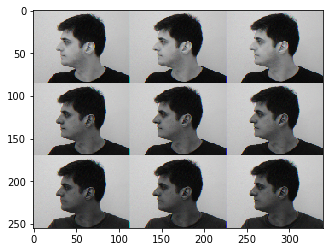

In [17]:
plt.imshow(test_tensor[0].view([255,340,3]))

Now lets import the train data which I took from facial keypoint detection competition of kaggle.com

In [117]:
train_path = 'E:\\Study material\\Models and Datasets\\SIH\\New folder (5)\\HELEN\\training data'
train_image = []
for img in os.listdir(train_path):
    path = train_path + "\\" + img
#     image = Image.open(os.path.join(train_path, img))
    image = Image.open(path)
    train_image.append(image)

In [119]:
len(train_image)

2330

lets separate out the train images from the co-ordinates of different keypoints.

In [129]:
anotation_path = 'E:\\Study material\\Models and Datasets\\SIH\\New folder (5)\\HELEN\\annotation'
anotations = [[] for s in range(2330)]
n = 0
imges = []
for anot in os.listdir(anotation_path):
    xes = []
    yes = []
    f = open(os.path.join(anotation_path, anot), 'r')
    pntr = 0
    for line in f:
        if pntr == 0:
            line = line.strip("\n")
            img = Image.open(train_path + "\\" +line +'.jpg')
            imges.append(img)         
                
        if pntr != 0:
            x, y = line.split(',')
            xes.append(float(x))
            yes.append(float(y))
        pntr += 1
    for s in range(len(xes)-1):
        anotations[n].append((xes[s], yes[s]))
    n += 1


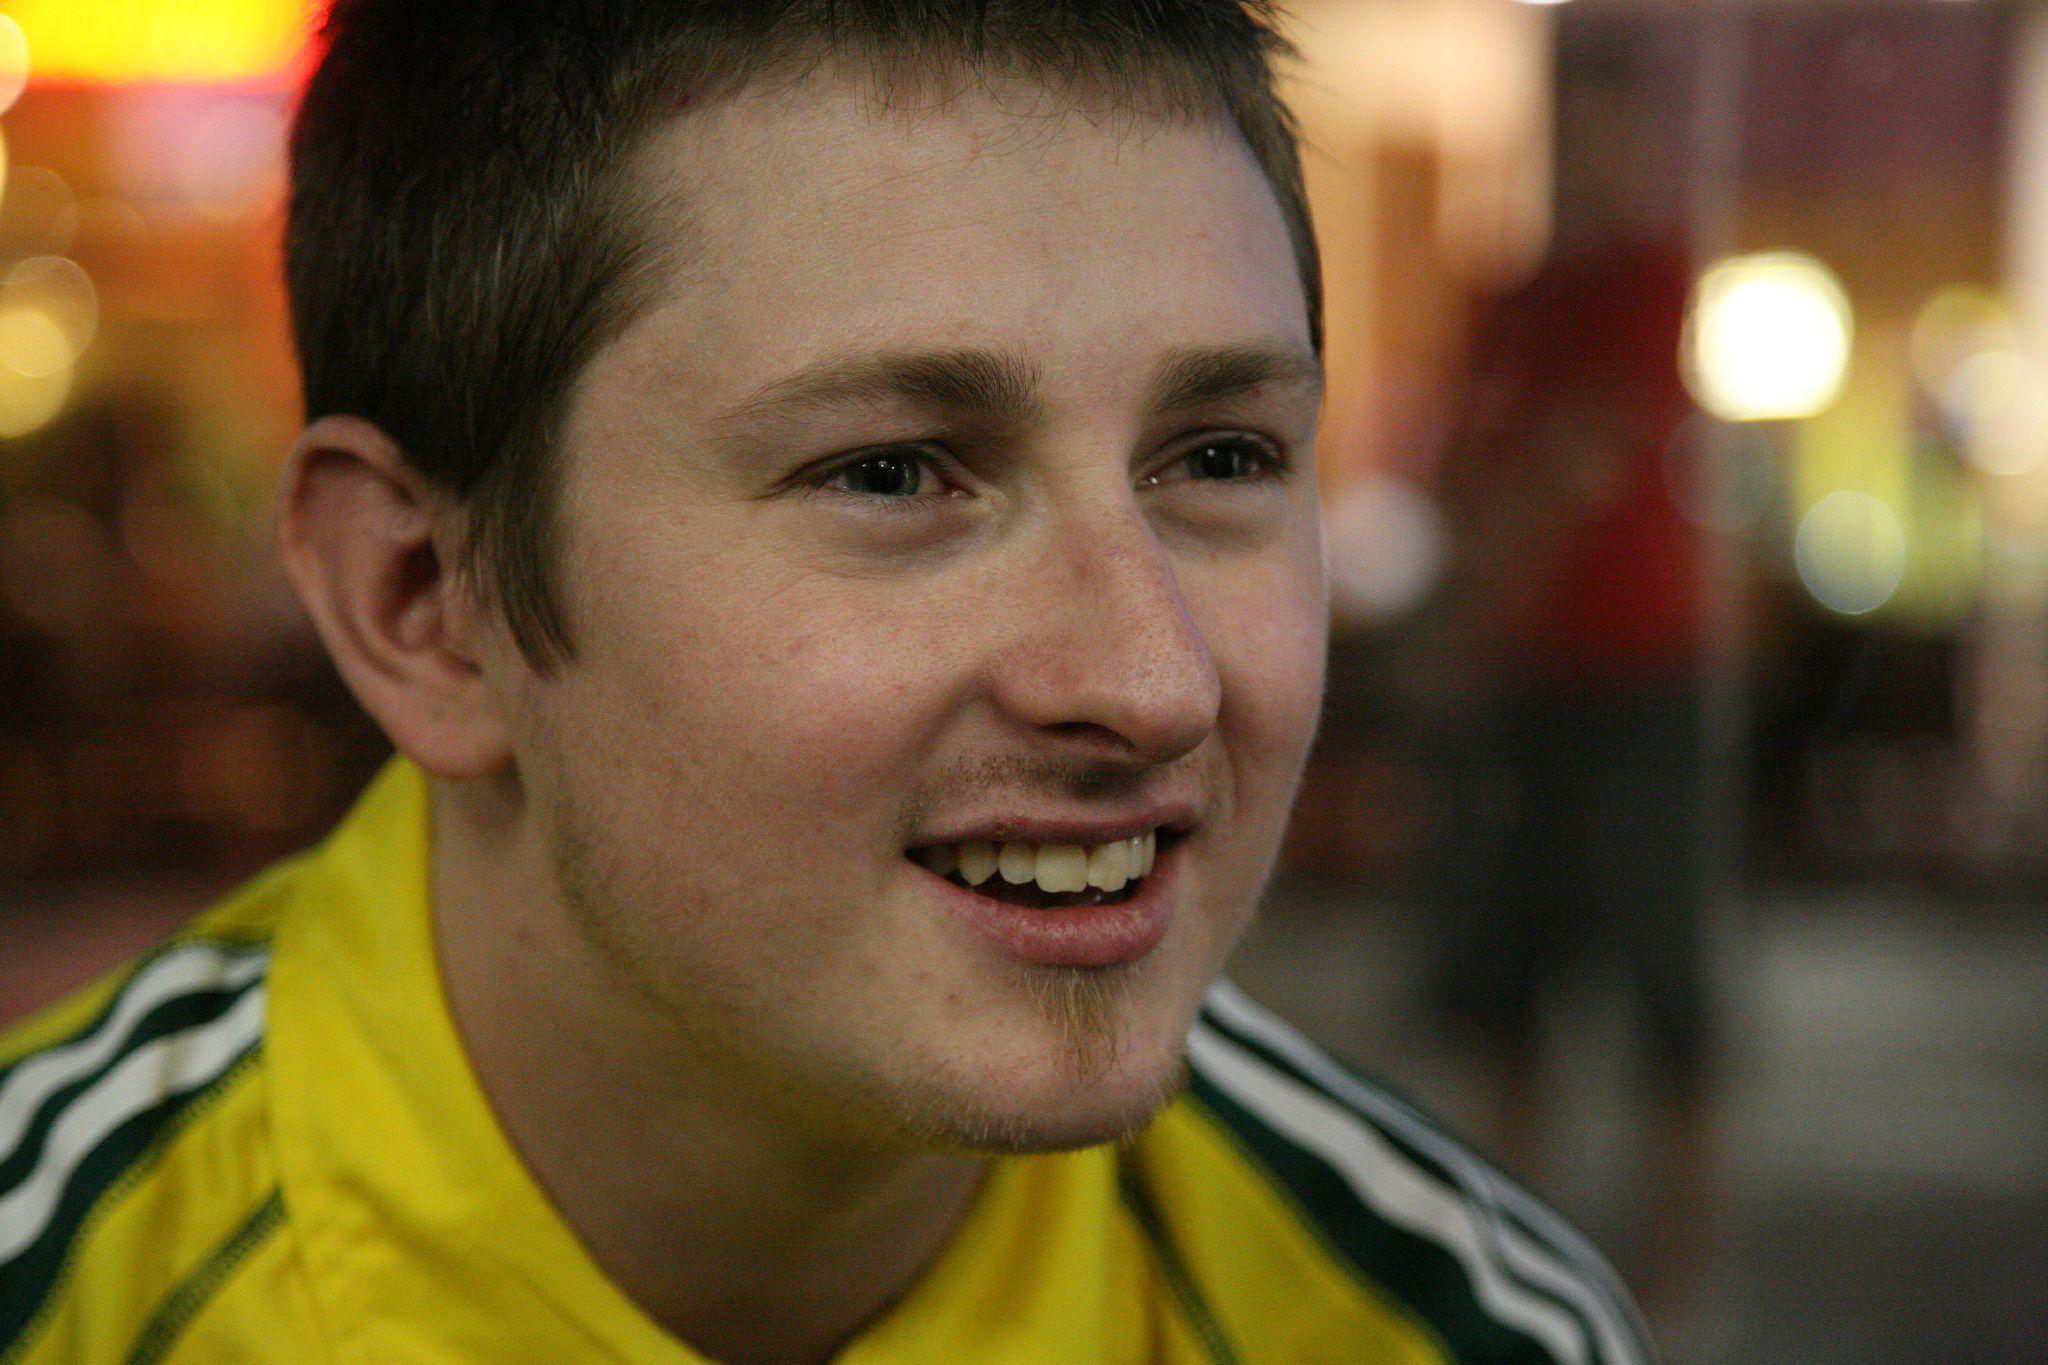

In [133]:
imges[2]

Lets Visualize how the training images looks like

In [126]:
def get_co(lst):
    x = []
    y = []
    for a, b in lst:
        x.append(a)
        y.append(b)
    return x, y  


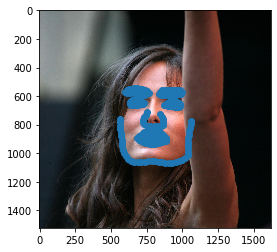

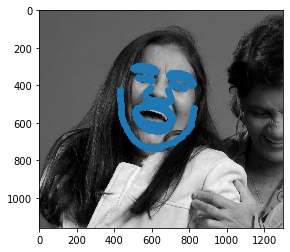

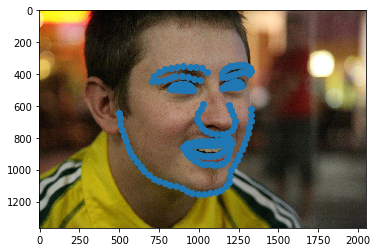

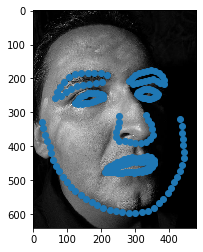

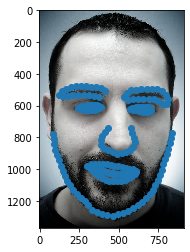

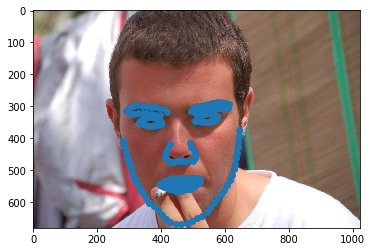

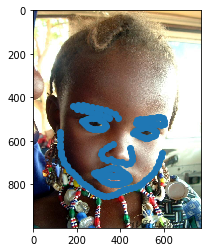

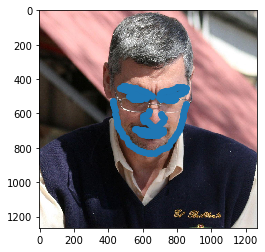

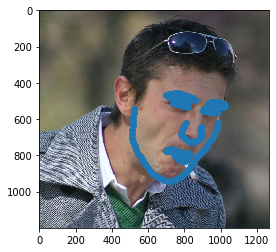

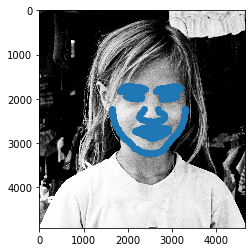

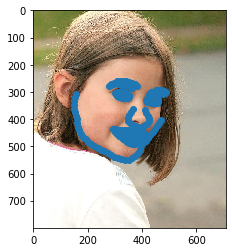

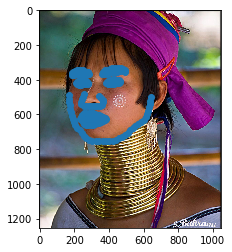

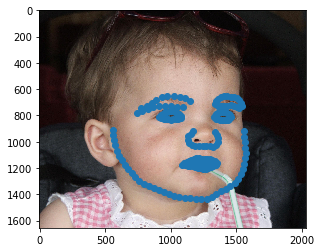

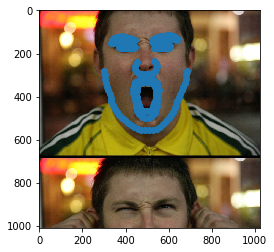

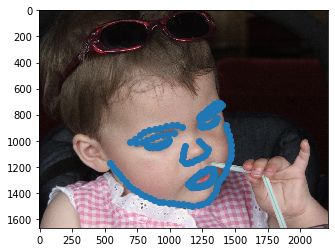

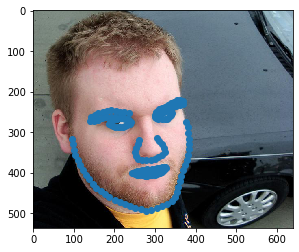

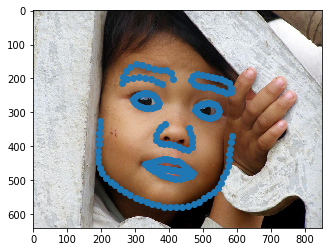

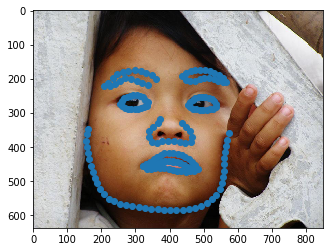

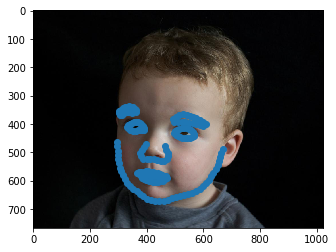

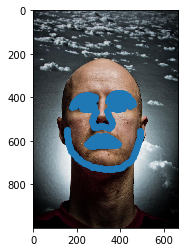

In [134]:
for i in range(20):
    plt.imshow(imges[i])
    x, y = get_co(anotations[i])
    plt.scatter(x, y)
    plt.show()

In [ ]:
class net(nn.modules):
    